In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import scipy.stats as st
import functions as f

%matplotlib inline

# Time Spent on Each Step Analysis

In [40]:
#Importing data
df_web_data = pd.read_csv("../data/clean/df_join_clean.csv")
df_web_data = df_web_data.sort_values(by=["client_id","date_time"], ascending=[True,True])
df_web_data

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,...,calls_6_mnth,logons_6_mnth,tenure,age_group,bal_category_3,bal_category_2,Variation,session_started,steps_status,session_completed
0,555,402506806_56087378777,637149525_38041617439_716659,0,2017-04-15 12:57:56,3,46,30,U,2,...,2,6,New Client,Young Adult,Low,Low,Test,1,0,1
1,555,402506806_56087378777,637149525_38041617439_716659,1,2017-04-15 12:58:03,3,46,30,U,2,...,2,6,New Client,Young Adult,Low,Low,Test,1,1,1
2,555,402506806_56087378777,637149525_38041617439_716659,2,2017-04-15 12:58:35,3,46,30,U,2,...,2,6,New Client,Young Adult,Low,Low,Test,1,1,1
3,555,402506806_56087378777,637149525_38041617439_716659,3,2017-04-15 13:00:14,3,46,30,U,2,...,2,6,New Client,Young Adult,Low,Low,Test,1,1,1
298282,555,402506806_56087378777,637149525_38041617439_716659,4,2017-04-15 13:00:34,3,46,30,U,2,...,2,6,New Client,Young Adult,Low,Low,Test,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276531,9999729,834634258_21862004160,870243567_56915814033_814203,2,2017-05-08 16:08:40,10,124,31,F,3,...,6,9,Long Standing Client,Adults,Medium,High,Test,1,1,1
276532,9999729,834634258_21862004160,870243567_56915814033_814203,3,2017-05-08 16:09:19,10,124,31,F,3,...,6,9,Long Standing Client,Adults,Medium,High,Test,1,1,1
306213,9999729,834634258_21862004160,870243567_56915814033_814203,4,2017-05-08 16:09:40,10,124,31,F,3,...,6,9,Long Standing Client,Adults,Medium,High,Test,1,0,1
276533,9999832,145538019_54444341400,472154369_16714624241_585315,0,2017-05-16 16:46:03,23,281,49,F,2,...,1,4,Long Standing Client,Adults,Medium,High,Test,1,0,0


In [41]:
#Creation and cleaning of columns for time difference and time spent

df_web_data["date_time"] = pd.to_datetime(df_web_data["date_time"])

#df_web_data["prev_step"] = df_web_data.groupby("visit_id")["process_step"].shift(1)
#is_repeated = df_web_data["process_step"] == df_web_data["prev_step"]

#df_web_data = df_web_data[~((df_web_data["process_step"] == 0) & is_repeated)]
df_web_data = df_web_data.drop_duplicates(subset=["visit_id", "process_step"], keep="last")
#df_web_data = df_web_data[~((df_web_data["process_step"] == 4) & is_repeated)]
df_web_data = df_web_data.drop_duplicates(subset=["visit_id", "process_step"], keep="last")

#df_web_data = df_web_data.drop(columns=["prev_step"])

df_web_data["time_diff"] = df_web_data.groupby("visit_id")["date_time"].diff()
df_web_data["time_spent"] = df_web_data["time_diff"].shift(-1)

In [42]:
df_time= df_web_data.dropna(subset=["Variation"], inplace = True)
df_time= df_web_data.dropna(subset=["time_spent"], inplace = True)
df_time = df_web_data[df_web_data["process_step"] != 4]
df_time["time_spent"] = df_time["time_spent"].dt.total_seconds().astype(float)
f.save_to_csv(df_time, "df_time.csv")
df_time

/var/folders/t7/r8w3_tr56x11jqj9zdjr7m4w0000gn/T/ipykernel_21127/1057096630.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time["time_spent"] = df_time["time_spent"].dt.total_seconds().astype(float)


DataFrame successfully saved to ../data/clean/df_time.csv


,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,...,tenure,age_group,bal_category_3,bal_category_2,Variation,session_started,steps_status,session_completed,time_diff,time_spent
0,555,402506806_56087378777,637149525_38041617439_716659,0,2017-04-15 12:57:56,3,46,30,U,2,...,New Client,Young Adult,Low,Low,Test,1,0,1,NaT,7.0
1,555,402506806_56087378777,637149525_38041617439_716659,1,2017-04-15 12:58:03,3,46,30,U,2,...,New Client,Young Adult,Low,Low,Test,1,1,1,0 days 00:00:07,32.0
2,555,402506806_56087378777,637149525_38041617439_716659,2,2017-04-15 12:58:35,3,46,30,U,2,...,New Client,Young Adult,Low,Low,Test,1,1,1,0 days 00:00:32,99.0
3,555,402506806_56087378777,637149525_38041617439_716659,3,2017-04-15 13:00:14,3,46,30,U,2,...,New Client,Young Adult,Low,Low,Test,1,1,1,0 days 00:01:39,20.0
4,647,66758770_53988066587,40369564_40101682850_311847,0,2017-04-12 15:41:28,12,151,58,M,2,...,Long Standing Client,Senior,Low,Low,Test,1,0,1,NaT,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276529,9999729,834634258_21862004160,870243567_56915814033_814203,0,2017-05-08 16:08:25,10,124,31,F,3,...,Long Standing Client,Adults,Medium,High,Test,1,0,1,NaT,5.0
276530,9999729,834634258_21862004160,870243567_56915814033_814203,1,2017-05-08 16:08:30,10,124,31,F,3,...,Long Standing Client,Adults,Medium,High,Test,1,1,1,0 days 00:00:05,10.0
276531,9999729,834634258_21862004160,870243567_56915814033_814203,2,2017-05-08 16:08:40,10,124,31,F,3,...,Long Standing Client,Adults,Medium,High,Test,1,1,1,0 days 00:00:10,39.0
276532,9999729,834634258_21862004160,870243567_56915814033_814203,3,2017-05-08 16:09:19,10,124,31,F,3,...,Long Standing Client,Adults,Medium,High,Test,1,1,1,0 days 00:00:39,21.0


## General Average Time Spent per Step

In [43]:
average_time_per_step = df_time.groupby("process_step")["time_spent"].mean()

df_results = pd.DataFrame({
    "average_time": average_time_per_step})

df_results

,average_time
process_step,
0,50.768115
1,55.327801
2,103.707584
3,126.376052


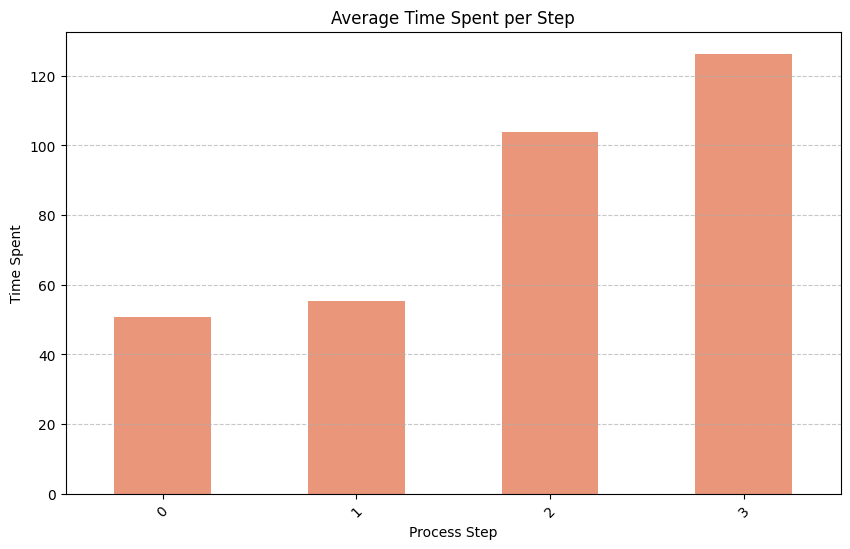

In [44]:
df_results["average_time"].plot(kind="bar", figsize=(10, 6), rot=45, color='darksalmon')
plt.title("Average Time Spent per Step")
plt.xlabel("Process Step")
plt.ylabel("Time Spent")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## Average Time Spent per Step by Group

In [45]:
grouped_stats = df_time.groupby(["process_step", "Variation"])["time_spent"].mean().reset_index()
crosstab_seconds = grouped_stats.pivot(index="process_step", columns="Variation", values="time_spent")

crosstab_seconds

Variation,Control,Test
process_step,,
0,53.779057,48.063226
1,55.980996,54.806738
2,104.111261,103.382497
3,138.072039,117.112825


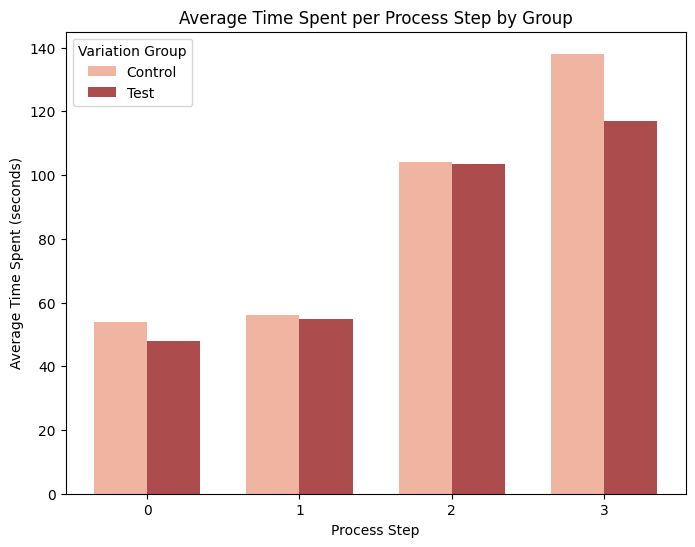

In [46]:
fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.35
x = crosstab_seconds.index  

ax.bar(x - bar_width / 2, crosstab_seconds["Control"], bar_width, label="Control", alpha=0.7, color='darksalmon')
ax.bar(x + bar_width / 2, crosstab_seconds["Test"], bar_width, label="Test", alpha=0.7, color='darkred')

ax.set_xlabel("Process Step")
ax.set_ylabel("Average Time Spent (seconds)")
ax.set_title("Average Time Spent per Process Step by Group")
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend(title="Variation Group")

plt.show()

# Hypothesis Testing

## One way (ANOVA)

In [47]:
#Control Group ANOVA

df_control_0 = df_time[(df_time["process_step"] == 0) & (df_time["Variation"] == "Control")]["time_spent"]
df_control_1 = df_time[(df_time["process_step"] == 1) & (df_time["Variation"] == "Control")]["time_spent"]
df_control_2 = df_time[(df_time["process_step"] == 2) & (df_time["Variation"] == "Control")]["time_spent"]
df_control_3 = df_time[(df_time["process_step"] == 3) & (df_time["Variation"] == "Control")]["time_spent"]

#H0: mu df_control_0 = mu df_control_1 = mu df_control_2 = df_control_3
#H1: mu df_control_0 != mu df_control_1 != mu df_control_2 != df_control_3

alpha = 0.05

anova_results_control = st.f_oneway(df_control_0, df_control_1, df_control_2, df_control_3)

print(f"F-Statistic: {anova_results_control.statistic:.5f}")  
print(f"P-Value: {anova_results_control.pvalue:.5f}")  

#As p-value < 0,05 we can reject Ho

F-Statistic: 887.65851
P-Value: 0.00000


In [48]:
#Test Group ANOVA

df_test_0 = df_time[(df_time["process_step"] == 0) & (df_time["Variation"] == "Test")]["time_spent"]
df_test_1 = df_time[(df_time["process_step"] == 1) & (df_time["Variation"] == "Test")]["time_spent"]
df_test_2 = df_time[(df_time["process_step"] == 2) & (df_time["Variation"] == "Test")]["time_spent"]
df_test_3 = df_time[(df_time["process_step"] == 3) & (df_time["Variation"] == "Test")]["time_spent"]

#H0: mu df_test_0 = mu df_test_1 = mu df_test_2 = df_test_3
#H1: mu df_test_0 != mu df_test_1 != mu df_test_2 != df_test_3

#alpha = 0.05

anova_results_test = st.f_oneway(df_test_0, df_test_1, df_test_2, df_test_3)

print(f"F-Statistic: {anova_results_test.statistic:.5f}")  
print(f"P-Value: {anova_results_test.pvalue:.5f}")  

#As p-value < 0,05 we can reject Ho

F-Statistic: 680.29540
P-Value: 0.00000


## Two_sample t-test

In [49]:
# Step 0 two_sample test (control vs test groups)

df_control_0_two = df_time[(df_time["process_step"] == 0 ) & (df_time["Variation"] == "Control")]["time_spent"]
df_test_0_two = df_time[(df_time["process_step"] == 0) & (df_time["Variation"] == "Test")]["time_spent"]


#H0: mu df_control_0_two = mu df_test_0_two
#H1: mu df_control_0_two != mu df_test_0_two

#alpha = 0,05

two_sided_0 = st.ttest_ind(df_control_0_two, df_test_0_two, equal_var=False, alternative="two-sided")

print(f"F-Statistic: {two_sided_0.statistic:.5f}")  
print(f"P-Value: {two_sided_0.pvalue:.5f}") 

#As p-value < 0,05 we can reject Ho

F-Statistic: 4.03865
P-Value: 0.00005


In [50]:
# Step 0 greater_sample test (control vs test groups)

df_control_0_greater = df_time[(df_time["process_step"] == 0 ) & (df_time["Variation"] == "Control")]["time_spent"]
df_test_0_greater = df_time[(df_time["process_step"] == 0) & (df_time["Variation"] == "Test")]["time_spent"]


#H0: mu df_test_0_greater <= mu df_control_0_greater
#H1: mu df_control_0_greater > mu df_test_0_greater

#alpha = 0,05

greater_0 = st.ttest_ind(df_test_0_greater, df_control_0_greater, equal_var=False, alternative="greater")

print(f"F-Statistic: {greater_0.statistic:.5f}")  
print(f"P-Value: {greater_0.pvalue:.5f}") 

#As p-value > 0,05 we cannot reject Ho. So mu df_test_0_greater is less or equal than mu df_control_0_greater

F-Statistic: -4.03865
P-Value: 0.99997


In [51]:
# Step 1 two_sample test (control vs test groups)

df_control_1_two = df_time[(df_time["process_step"] == 1 ) & (df_time["Variation"] == "Control")]["time_spent"]
df_test_1_two = df_time[(df_time["process_step"] == 1) & (df_time["Variation"] == "Test")]["time_spent"]


#H0: mu df_control_1_two = mu df_test_1_two
#H1: mu df_control_1_two != mu df_test_1_two

#alpha = 0,05

two_sided_1 = st.ttest_ind(df_control_1_two, df_test_1_two, equal_var=False, alternative="two-sided")

print(f"F-Statistic: {two_sided_1.statistic:.5f}")  
print(f"P-Value: {two_sided_1.pvalue:.5f}") 

#As p-value > 0,05 we cannot reject Ho

F-Statistic: 0.75256
P-Value: 0.45172


In [52]:
# Step 2 two_sample test (control vs test groups)

df_control_2_two = df_time[(df_time["process_step"] == 2 ) & (df_time["Variation"] == "Control")]["time_spent"]
df_test_2_two = df_time[(df_time["process_step"] == 2) & (df_time["Variation"] == "Test")]["time_spent"]


#H0: mu df_control_2_two = mu df_test_2_two
#H1: mu df_control_2_two != mu df_test_2_two

#alpha = 0,05

two_sided_2 = st.ttest_ind(df_control_2_two, df_test_2_two, equal_var=False, alternative="two-sided")

print(f"F-Statistic: {two_sided_2.statistic:.5f}")  
print(f"P-Value: {two_sided_2.pvalue:.5f}") 

#As p-value > 0,05 we cannot reject Ho

F-Statistic: 0.31763
P-Value: 0.75077


In [53]:
# Step 3 two_sample test (control vs test groups)

df_control_3_two = df_time[(df_time["process_step"] == 3 ) & (df_time["Variation"] == "Control")]["time_spent"]
df_test_3_two = df_time[(df_time["process_step"] == 3) & (df_time["Variation"] == "Test")]["time_spent"]


#H0: mu df_control_3_two = mu df_test_3_two
#H1: mu df_control_3_two != mu df_test_3_two

#alpha = 0,05

two_sided_3 = st.ttest_ind(df_control_3_two, df_test_3_two, equal_var=False, alternative="two-sided")

print(f"F-Statistic: {two_sided_3.statistic:.5f}")  
print(f"P-Value: {two_sided_3.pvalue:.5f}") 

#As p-value > 0,05 we cannot reject Ho

F-Statistic: 9.42821
P-Value: 0.00000


# Age exploration

Variation       Control       Test
process_step                      
0             39.419860  37.570068
1             38.506048  43.228210
2             91.698185  94.958527
3             93.462843  69.452408


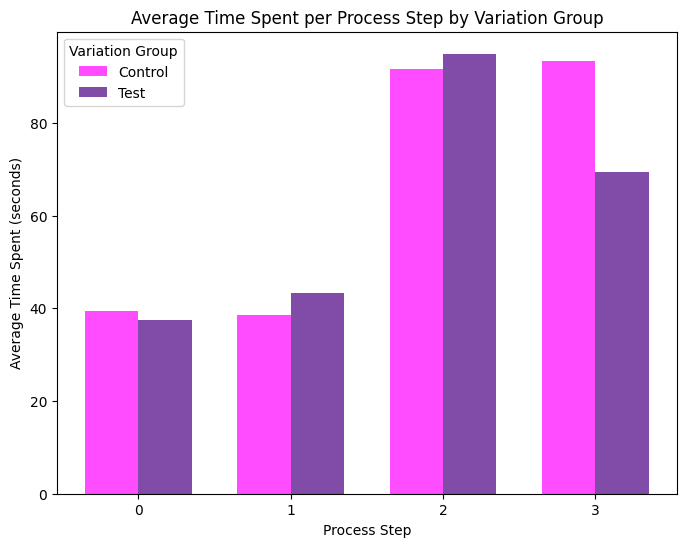

In [54]:
#YOUNG ADULT

df_grouping_yadult = df_time[df_time["age_group"] == "Young Adult"]
grouped_stats_yadult = df_grouping_yadult.groupby(["process_step", "Variation"])["time_spent"].mean().reset_index()
crosstab_seconds_yadult = grouped_stats_yadult.pivot(index="process_step", columns="Variation", values="time_spent")

print(crosstab_seconds_yadult)
fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.35
x = crosstab_seconds_yadult.index  

ax.bar(x - bar_width / 2, crosstab_seconds_yadult["Control"], bar_width, label="Control", alpha=0.7, color='magenta')
ax.bar(x + bar_width / 2, crosstab_seconds_yadult["Test"], bar_width, label="Test", alpha=0.7, color='indigo')

ax.set_xlabel("Process Step")
ax.set_ylabel("Average Time Spent (seconds)")
ax.set_title("Average Time Spent per Process Step by Variation Group")
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend(title="Variation Group")
plt.show()

Variation        Control        Test
process_step                        
0              46.302998   39.450654
1              46.846573   46.700969
2             110.487287  105.865385
3             112.552837   87.990645


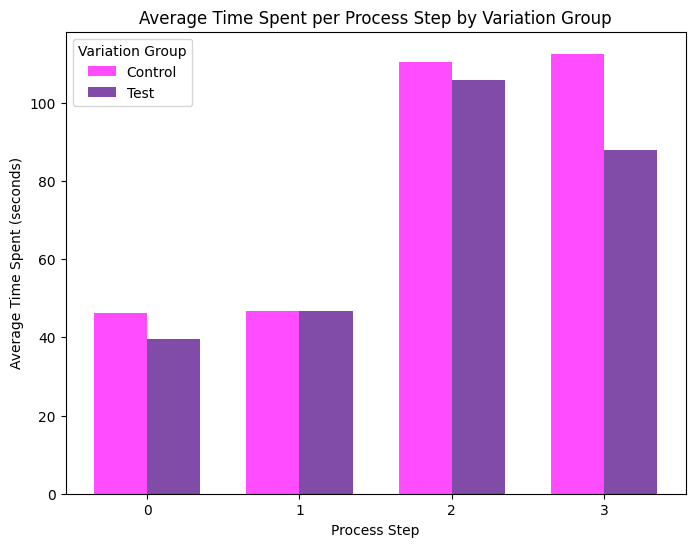

In [55]:
#ADULTS

df_grouping_adult = df_time[df_time["age_group"] == "Adults"]
grouped_stats_adult = df_grouping_adult.groupby(["process_step", "Variation"])["time_spent"].mean().reset_index()
crosstab_seconds_adult = grouped_stats_adult.pivot(index="process_step", columns="Variation", values="time_spent")

print(crosstab_seconds_adult)
fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.35
x = crosstab_seconds_adult.index  

ax.bar(x - bar_width / 2, crosstab_seconds_adult["Control"], bar_width, label="Control", alpha=0.7, color='magenta')
ax.bar(x + bar_width / 2, crosstab_seconds_adult["Test"], bar_width, label="Test", alpha=0.7, color='indigo')

ax.set_xlabel("Process Step")
ax.set_ylabel("Average Time Spent (seconds)")
ax.set_title("Average Time Spent per Process Step by Variation Group")
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend(title="Variation Group")
plt.show()

Variation        Control        Test
process_step                        
0              61.093996   56.347803
1              67.020489   62.852019
2             105.934420  105.880102
3             169.094430  151.265995


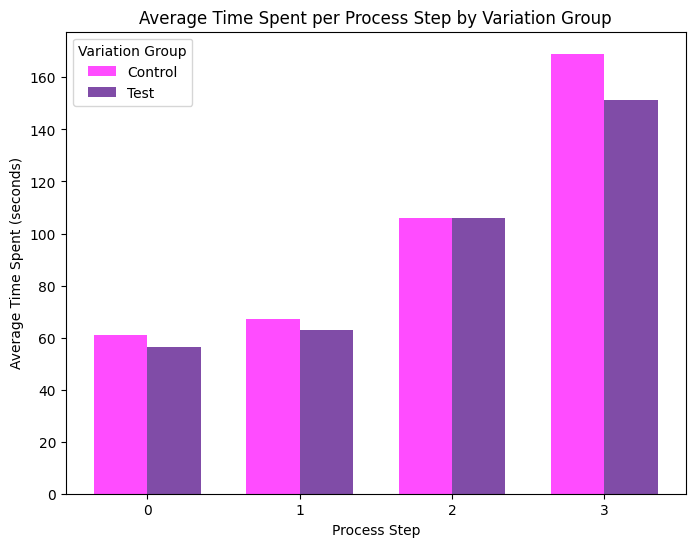

In [56]:
#SENIOR

df_grouping_senior = df_time[df_time["age_group"] == "Senior"]
grouped_stats_senior = df_grouping_senior.groupby(["process_step", "Variation"])["time_spent"].mean().reset_index()
crosstab_seconds_senior = grouped_stats_senior.pivot(index="process_step", columns="Variation", values="time_spent")

print(crosstab_seconds_senior)
fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.35
x = crosstab_seconds_senior.index  

ax.bar(x - bar_width / 2, crosstab_seconds_senior["Control"], bar_width, label="Control", alpha=0.7, color='magenta')
ax.bar(x + bar_width / 2, crosstab_seconds_senior["Test"], bar_width, label="Test", alpha=0.7, color='indigo')

ax.set_xlabel("Process Step")
ax.set_ylabel("Average Time Spent (seconds)")
ax.set_title("Average Time Spent per Process Step by Variation Group")
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend(title="Variation Group")
plt.show()

Variation        Control        Test
process_step                        
0              82.741528   72.487384
1              86.476974   79.468887
2              88.669052   95.856759
3             220.806818  199.978992


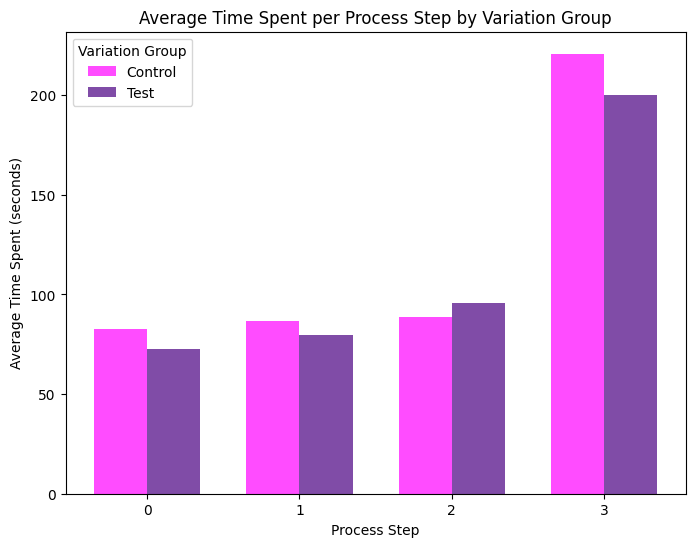

In [57]:
#ELDERLY

df_grouping_elderly = df_time[df_time["age_group"] == "Elderly"]
grouped_stats_elderly = df_grouping_elderly.groupby(["process_step", "Variation"])["time_spent"].mean().reset_index()
crosstab_seconds_elderly = grouped_stats_elderly.pivot(index="process_step", columns="Variation", values="time_spent")

print(crosstab_seconds_elderly)
fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.35
x = crosstab_seconds_elderly.index  

ax.bar(x - bar_width / 2, crosstab_seconds_elderly["Control"], bar_width, label="Control", alpha=0.7, color='magenta')
ax.bar(x + bar_width / 2, crosstab_seconds_elderly["Test"], bar_width, label="Test", alpha=0.7, color='indigo')

ax.set_xlabel("Process Step")
ax.set_ylabel("Average Time Spent (seconds)")
ax.set_title("Average Time Spent per Process Step by Variation Group")
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend(title="Variation Group")
plt.show()

## Primary Client (senior) hypothesis testing

In [58]:
# Step 0 two_sample test senior(control vs test groups)

df_control_0_senior = df_time[(df_time["process_step"] == 0 ) & (df_time["Variation"] == "Control") & (df_time["age_group"] == "Senior")]["time_spent"]
df_test_0_senior = df_time[(df_time["process_step"] == 0) & (df_time["Variation"] == "Test")& (df_time["age_group"] == "Senior")]["time_spent"]


#H0: mu df_control_0_senior = mu df_test_0_senior
#H1: mu df_control_0_senior != mu df_test_0_senior

#alpha = 0,05

two_sided_0_senior = st.ttest_ind(df_control_0_senior, df_test_0_senior, equal_var=False, alternative="two-sided")

print(f"F-Statistic: {two_sided_0_senior.statistic:.5f}")  
print(f"P-Value: {two_sided_0_senior.pvalue:.5f}") 

#As p-value < 0,05 we can reject Ho

F-Statistic: 2.11981
P-Value: 0.03404


In [59]:
# Step 1 two_sample test senior (control vs test groups)

df_control_1_senior = df_time[(df_time["process_step"] == 1 ) & (df_time["Variation"] == "Control") & (df_time["age_group"] == "Senior")]["time_spent"]
df_test_1_senior = df_time[(df_time["process_step"] == 1) & (df_time["Variation"] == "Test") & (df_time["age_group"] == "Senior")]["time_spent"]


#H0: mu df_control_1_senior = mu df_test_1_senior
#H1: mu df_control_1_senior != mu df_test_1_senior

#alpha = 0,05

two_sided_1_senior = st.ttest_ind(df_control_1_senior, df_test_1_senior, equal_var=False, alternative="two-sided")

print(f"F-Statistic: {two_sided_1_senior.statistic:.5f}")  
print(f"P-Value: {two_sided_1_senior.pvalue:.5f}") 

#As p-value > 0,05 we cannot reject Ho

F-Statistic: 1.84688
P-Value: 0.06478


In [60]:
# Step 2 two_sample test senior (control vs test groups)

df_control_2_senior = df_time[(df_time["process_step"] == 2 ) & (df_time["Variation"] == "Control") & (df_time["age_group"] == "Senior")]["time_spent"]
df_test_2_senior = df_time[(df_time["process_step"] == 2) & (df_time["Variation"] == "Test") & (df_time["age_group"] == "Senior")]["time_spent"]


#H0: mu df_control_2_senior = mu df_test_2_senior
#H1: mu df_control_2_senior != mu df_test_2_senior

#alpha = 0,05

two_sided_2_senior = st.ttest_ind(df_control_2_senior, df_test_2_senior, equal_var=False, alternative="two-sided")

print(f"F-Statistic: {two_sided_2_senior.statistic:.5f}")  
print(f"P-Value: {two_sided_2_senior.pvalue:.5f}") 

#As p-value > 0,05 we cannot reject Ho

F-Statistic: 0.01548
P-Value: 0.98765


In [61]:
# Step 3 two_sample test senior (control vs test groups)

df_control_3_senior = df_time[(df_time["process_step"] == 3 ) & (df_time["Variation"] == "Control") & (df_time["age_group"] == "Senior")]["time_spent"]
df_test_3_senior= df_time[(df_time["process_step"] == 3) & (df_time["Variation"] == "Test") & (df_time["age_group"] == "Senior")]["time_spent"]


#H0: mu df_control_3_senior = mu df_test_3_senior
#H1: mu df_control_3_senior != mu df_test_3_senior

#alpha = 0,05

two_sided_3_senior = st.ttest_ind(df_control_3_senior, df_test_3_senior, equal_var=False, alternative="two-sided")

print(f"F-Statistic: {two_sided_3_senior.statistic:.5f}")  
print(f"P-Value: {two_sided_3_senior.pvalue:.5f}") 

#As p-value < 0,05 we can reject Ho

F-Statistic: 4.51207
P-Value: 0.00001
